We first define the multiHead attention 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.stats import shapiro, normaltest, anderson
from scipy.signal import correlate

# Load the dataset
file_path = "data/dataset_train_2024.csv"  # Update with your file's path if needed
data = pd.read_csv(file_path)

# Dataset Overview
print(f"Dataset Shape: {data.shape}")
print(f"Dataset Head:\n{data.head()}")

# Separate I/Q components and SNR
I_samples = data.iloc[:, 0:128]
Q_samples = data.iloc[:, 128:256]
SNR = data.iloc[:, 256]



Dataset Shape: (12000, 259)
Dataset Head:
   Unnamed: 0         0         1         2         3         4         5  \
0           0 -0.002737 -0.003256 -0.002842 -0.003326 -0.003696 -0.002624   
1           1 -0.002686 -0.003358 -0.004155 -0.005550 -0.006590 -0.007223   
2           2 -0.002638 -0.002471 -0.002312 -0.002172 -0.002040 -0.002214   
3           3 -0.001875 -0.002034 -0.002197 -0.002201 -0.002347 -0.002576   
4           4 -0.006637 -0.006698 -0.007560 -0.007685 -0.008237 -0.007881   

          6         7         8  ...       248       249       250       251  \
0 -0.002620 -0.001829 -0.001033  ...  0.002027  0.001587  0.001841  0.000575   
1 -0.008217 -0.007652 -0.007635  ...  0.003441  0.005547  0.006535  0.007792   
2 -0.002414 -0.002673 -0.002983  ...  0.006023  0.003708  0.000989 -0.001881   
3 -0.002803 -0.002939 -0.002884  ...  0.007631  0.007210  0.007103  0.007050   
4 -0.006156 -0.006350 -0.005546  ... -0.008638 -0.009310 -0.009821 -0.009019   

        252   

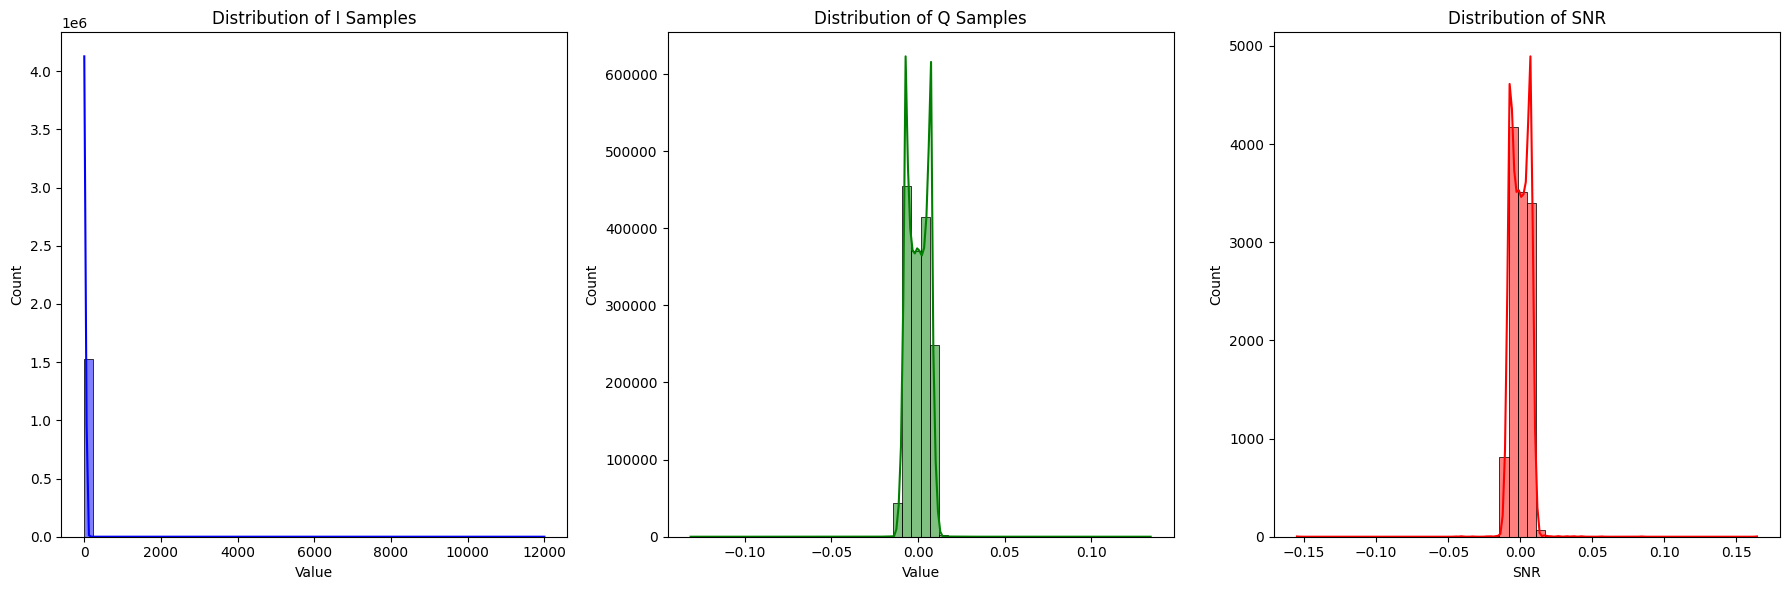

In [15]:
def plot_distributions():
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    sns.histplot(I_samples.values.flatten(), bins=50, kde=True, ax=axes[0], color="blue")
    axes[0].set_title("Distribution of I Samples")
    axes[0].set_xlabel("Value")
    
    sns.histplot(Q_samples.values.flatten(), bins=50, kde=True, ax=axes[1], color="green")
    axes[1].set_title("Distribution of Q Samples")
    axes[1].set_xlabel("Value")
    
    sns.histplot(SNR, bins=50, kde=True, ax=axes[2], color="red")
    axes[2].set_title("Distribution of SNR")
    axes[2].set_xlabel("SNR")
    
    plt.tight_layout()
    plt.show()

plot_distributions()

In [16]:
def check_normality(data, feature_name):
    print(f"\nChecking Normality for {feature_name}:")
    # Shapiro-Wilk Test
    stat, p = shapiro(data)
    print(f"Shapiro-Wilk Test: Statistic={stat:.3f}, p-value={p:.3f}")
    if p > 0.05:
        print(f"{feature_name} appears to be normally distributed (Shapiro-Wilk).")
    else:
        print(f"{feature_name} is not normally distributed (Shapiro-Wilk).")
    
    # D'Agostino and Pearson Test
    stat, p = normaltest(data)
    print(f"D'Agostino and Pearson Test: Statistic={stat:.3f}, p-value={p:.3f}")
    if p > 0.05:
        print(f"{feature_name} appears to be normally distributed (D'Agostino).")
    else:
        print(f"{feature_name} is not normally distributed (D'Agostino).")
    
    # Anderson-Darling Test
    result = anderson(data)
    print("Anderson-Darling Test:")
    print(f"Statistic={result.statistic:.3f}")
    for i, crit in enumerate(result.critical_values):
        sl, cv = result.significance_level[i], crit
        if result.statistic < cv:
            print(f"Significance Level {sl}%: Test Passed (Data is Normal)")
        else:
            print(f"Significance Level {sl}%: Test Failed (Data is Not Normal)")

check_normality(I_samples.values.flatten(), "I Samples")
check_normality(Q_samples.values.flatten(), "Q Samples")
check_normality(SNR, "SNR")


Checking Normality for I Samples:
Shapiro-Wilk Test: Statistic=0.050, p-value=0.000
I Samples is not normally distributed (Shapiro-Wilk).
D'Agostino and Pearson Test: Statistic=2872092.894, p-value=0.000
I Samples is not normally distributed (D'Agostino).


c:\Users\mique\Documents\UNI\MATT\MLEARN\Competition\.venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1536000.
  res = hypotest_fun_out(*samples, **kwds)


Anderson-Darling Test:
Statistic=584814.552
Significance Level 15.0%: Test Failed (Data is Not Normal)
Significance Level 10.0%: Test Failed (Data is Not Normal)
Significance Level 5.0%: Test Failed (Data is Not Normal)
Significance Level 2.5%: Test Failed (Data is Not Normal)
Significance Level 1.0%: Test Failed (Data is Not Normal)

Checking Normality for Q Samples:
Shapiro-Wilk Test: Statistic=0.954, p-value=0.000
Q Samples is not normally distributed (Shapiro-Wilk).
D'Agostino and Pearson Test: Statistic=21924.321, p-value=0.000
Q Samples is not normally distributed (D'Agostino).
Anderson-Darling Test:
Statistic=23230.965
Significance Level 15.0%: Test Failed (Data is Not Normal)
Significance Level 10.0%: Test Failed (Data is Not Normal)
Significance Level 5.0%: Test Failed (Data is Not Normal)
Significance Level 2.5%: Test Failed (Data is Not Normal)
Significance Level 1.0%: Test Failed (Data is Not Normal)

Checking Normality for SNR:
Shapiro-Wilk Test: Statistic=0.873, p-value=0

c:\Users\mique\Documents\UNI\MATT\MLEARN\Competition\.venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12000.
  res = hypotest_fun_out(*samples, **kwds)


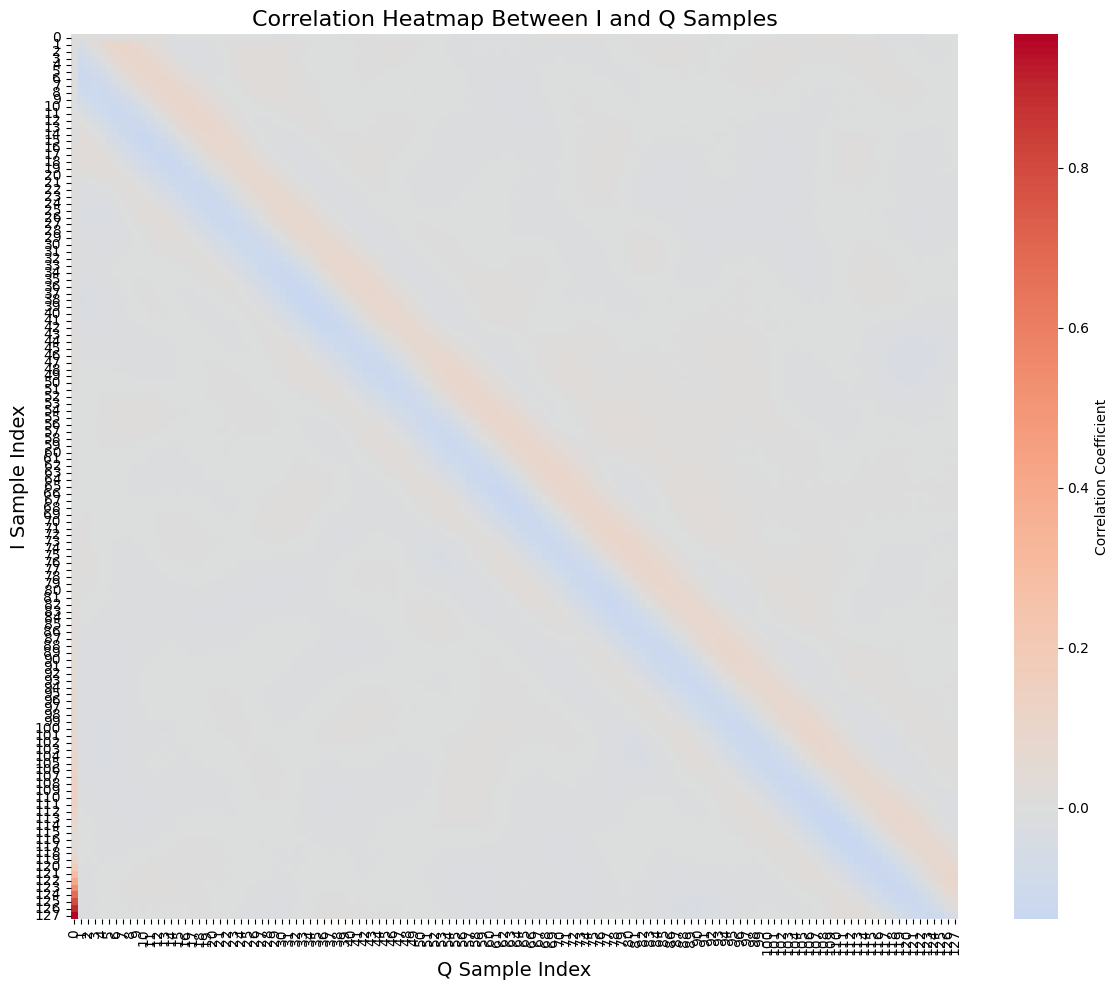

In [17]:
def plot_correlation_heatmap_with_labels():
    # Calculate correlation between corresponding I and Q samples
    correlation_matrix = np.zeros((128, 128))
    
    for i in range(128):
        for j in range(128):
            correlation_matrix[i, j] = np.corrcoef(I_samples.iloc[:, i], Q_samples.iloc[:, j])[0, 1]

    plt.figure(figsize=(12, 10))
    sns.heatmap(
        correlation_matrix, 
        cmap="coolwarm", 
        center=0, 
        xticklabels=range(128), 
        yticklabels=range(128), 
        cbar_kws={"label": "Correlation Coefficient"}
    )
    plt.title("Correlation Heatmap Between I and Q Samples", fontsize=16)
    plt.xlabel("Q Sample Index", fontsize=14)
    plt.ylabel("I Sample Index", fontsize=14)
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=10, rotation=0)
    plt.tight_layout()
    plt.show()

plot_correlation_heatmap_with_labels()

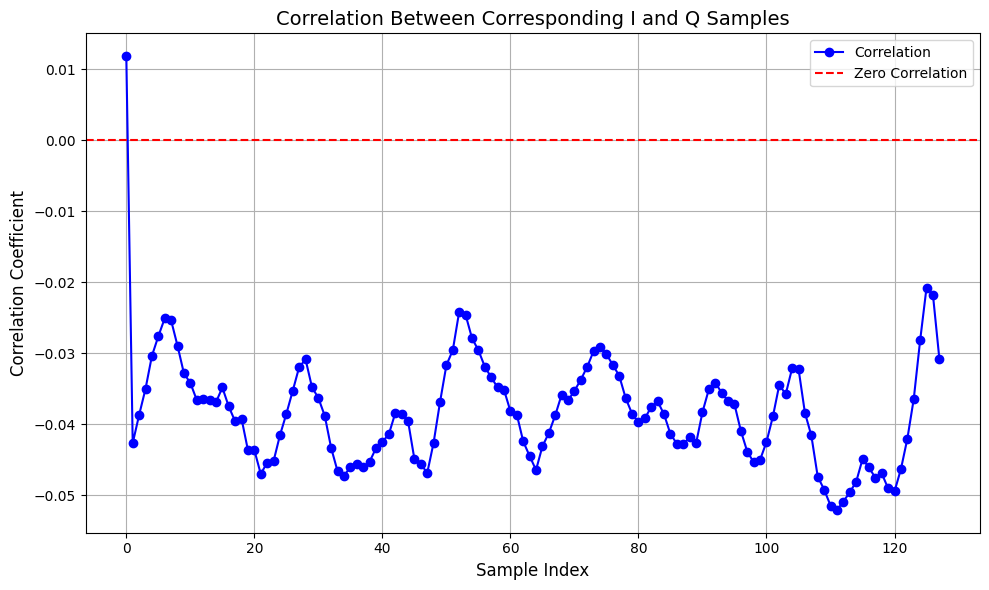

In [18]:
def plot_sequence_correlation():
    # Calculate correlation between corresponding I and Q samples
    correlation = [np.corrcoef(I_samples.iloc[:, i], Q_samples.iloc[:, i])[0, 1] for i in range(I_samples.shape[1])]
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(correlation)), correlation, marker='o', color='blue', label="Correlation")
    plt.title("Correlation Between Corresponding I and Q Samples", fontsize=14)
    plt.xlabel("Sample Index", fontsize=12)
    plt.ylabel("Correlation Coefficient", fontsize=12)
    plt.axhline(0, color="red", linestyle="--", label="Zero Correlation")
    plt.legend(fontsize=10)
    plt.grid()
    plt.tight_layout()
    plt.show()

plot_sequence_correlation()

C:\Users\mique\AppData\Local\Temp\ipykernel_22548\4203090596.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


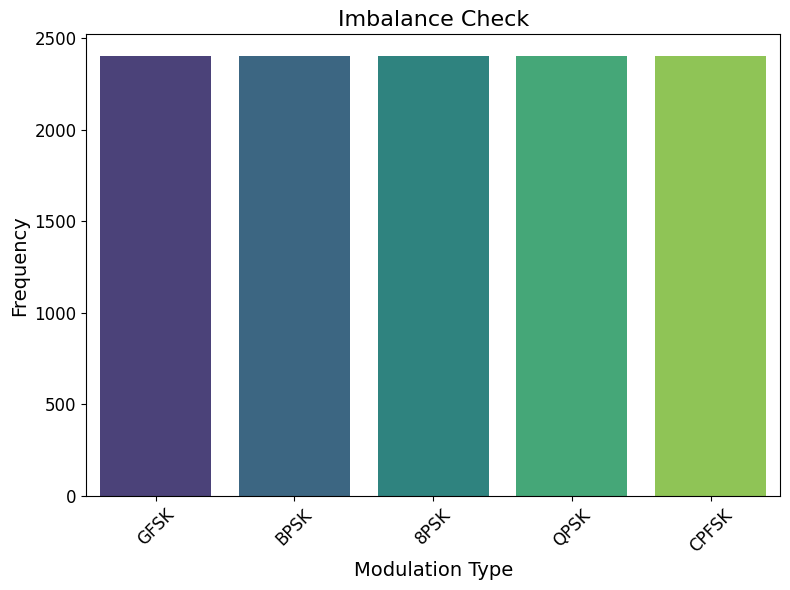

Label Distribution:
257
GFSK     2400
BPSK     2400
8PSK     2400
QPSK     2400
CPFSK    2400
Name: count, dtype: int64


In [19]:
def plot_data_balance():
    # Extract the labels column (last column in the dataset)
    labels = data.iloc[:, -1]  # Assuming the last column contains the labels

    # Count the occurrences of each unique label
    label_counts = labels.value_counts()

    # Plot the distribution of labels
    plt.figure(figsize=(8, 6))
    sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
    plt.title("Imbalance Check", fontsize=16)
    plt.xlabel("Modulation Type", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

    # Print the counts for additional clarity
    print("Label Distribution:")
    print(label_counts)

plot_data_balance()

c:\Users\mique\Documents\UNI\MATT\MLEARN\Competition\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


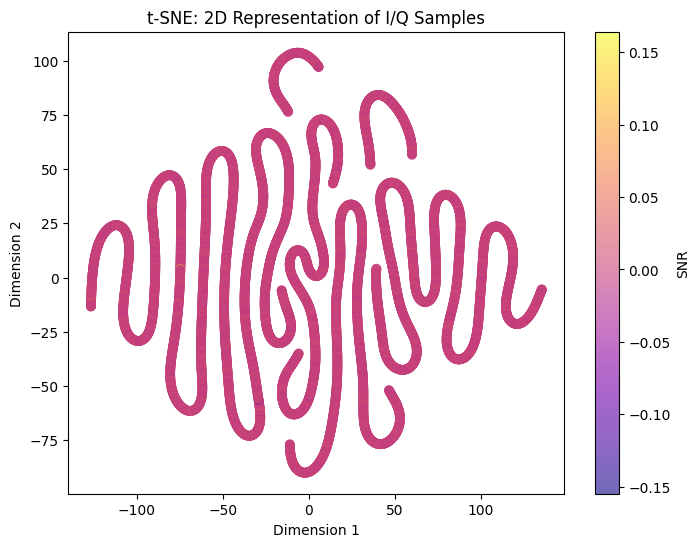

In [20]:
def plot_tsne():
    combined = pd.concat([I_samples, Q_samples], axis=1)
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
    tsne_result = tsne.fit_transform(combined)
    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.6, c=SNR, cmap="plasma")
    plt.colorbar(label="SNR")
    plt.title("t-SNE: 2D Representation of I/Q Samples")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

plot_tsne()

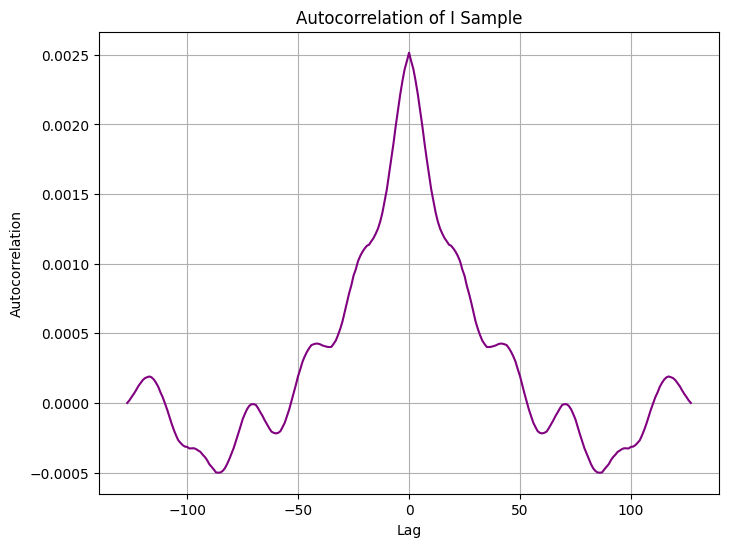

In [ ]:
def plot_autocorrelation_I():
    signal_sample = I_samples.iloc[0, :]  # Example: first signal's I component
    autocorr = correlate(signal_sample, signal_sample, mode='full')
    lags = np.arange(-len(signal_sample) + 1, len(signal_sample))
    
    plt.figure(figsize=(8, 6))
    plt.plot(lags, autocorr, color="purple")
    plt.title("Autocorrelation of I Sample")
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")
    plt.grid()
    plt.show()

def plot_autocorrelation_Q():
    signal_sample = Q_samples.iloc[0, :]  # Example: first signal's I component
    autocorr = correlate(signal_sample, signal_sample, mode='full')
    lags = np.arange(-len(signal_sample) + 1, len(signal_sample))
    
    plt.figure(figsize=(8, 6))
    plt.plot(lags, autocorr, color="purple")
    plt.title("Autocorrelation of Q Sample")
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")
    plt.grid()
    plt.show()

plot_autocorrelation_I()
plot_autocorrelation_Q()